# DS 3000 - Assignment 11

**Student Name**: Savir Khanna

**Date**: 11/14/25


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

(2 pts) Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [84]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data looks relatively normal for the most part, with every column having 768 rows. For varibales like Age, BMI, SkinTHickness there seems to be a relatively normal distribution with appropraite standard deviations and quartile splits. It's important to note however the SkinThickness seems to be all or nothing, as 25% are 0 with the max being 99. Insulin is also very varibale with a mean of 32, a minimum or 0, and a maxmium of 846. Multiple outlier seem to be present there.

## Question 2: 
(5 pts) Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.


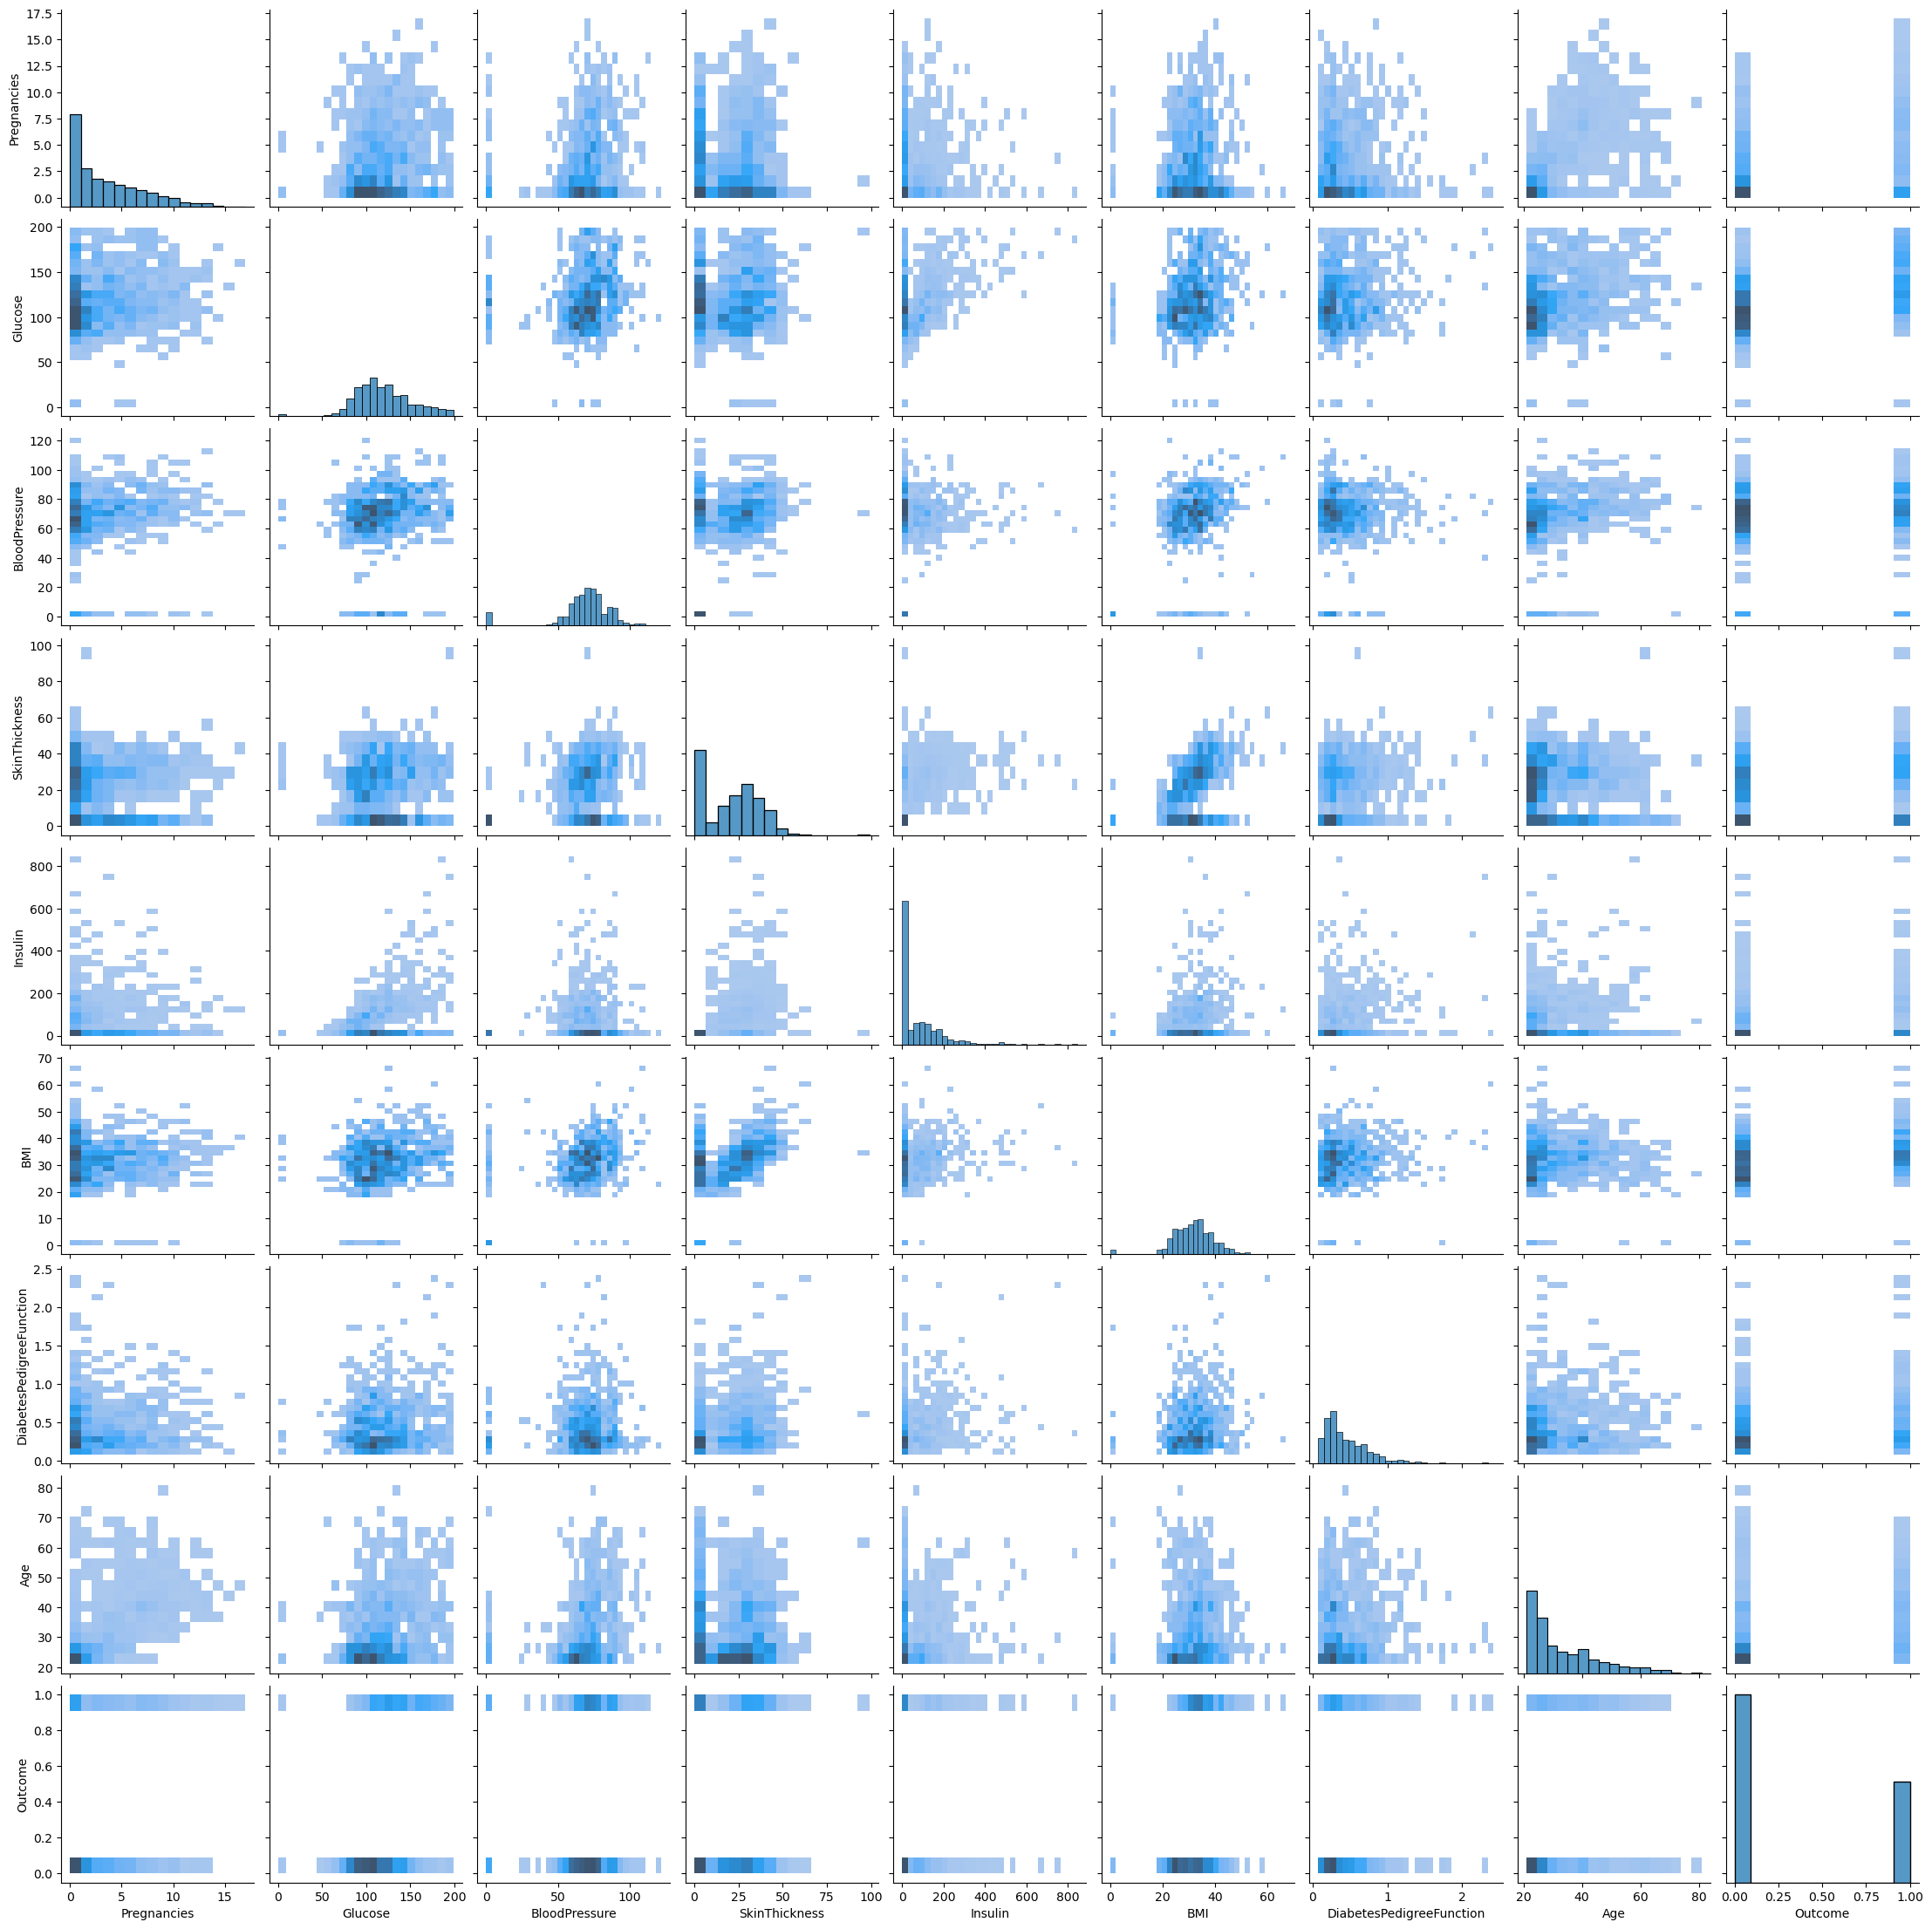

In [86]:
sns.pairplot(df, kind="hist")

I used sns.pariplot for this graph to get a general overview of the univariate and paired data for each variables. Most seem to have positive correlation relationships, and a high amount of them are skewed to the right which is important to note.

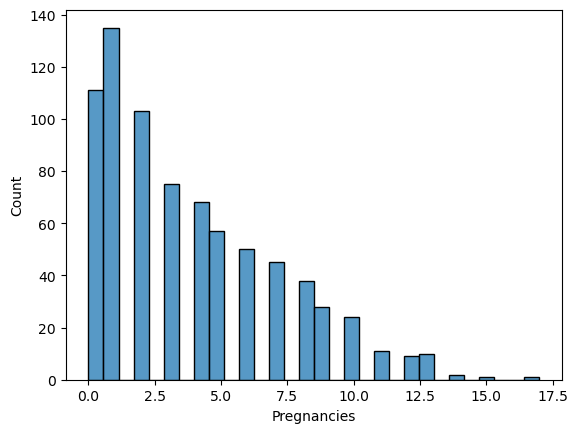

In [87]:
sns.histplot(data=df, x="Pregnancies", bins=30)  # numeric column
plt.show()

After looking at all the pairwise relationships between variables, I wanted to see the uniform distribution of pregnancies and we can see its clearly skewed right. In general most women seem to have between 0 and 3 pregnancies with a decreasing trend as it goes on.

## Question 3: 
(3 pts) Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).


In [88]:
columns = ["Insulin", "BloodPressure", "Glucose", "Age", "DiabetesPedigreeFunction"] 
# replace these columns with 0s with the calculated mean
for col in columns:
    mean_value = df[col].replace(0, np.nan).mean()
    df[col] = df[col].replace(0, mean_value)

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,20.536458,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,15.952218,85.021108,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,23.000000,155.548223,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Question 4: 
(5 pts) Partition the data into train/test sets. After which, perform the following:
encode any categorical data
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).



In [89]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [90]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', "Pregnancies"]]
y = df['Outcome'] # only categorical var so set as y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# standaridizing numeric data, no categorical vars
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Question 5: 
(10 pts) Build the model that predicts the target variable. Ensure that you:
Instantiate the correct SVM model, train and evaluate it.
Use GridSearchCV to tune at least two hyperparameters.**
Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.


In [111]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [112]:
svc = SVC()

In [113]:
# hyperparameters and grid search
param_grid = {
    'C': [0.1, 1, 10, 100],          
    'gamma': ['scale', 0.01, 0.001],
}

grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)

In [114]:
grid.fit(X_train_scaled, y_train)

print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'C': 100, 'gamma': 0.001}
Best CV score: 0.7671331467413035


## Question 6: 
(5 pts) Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.


In [115]:
best_svm = grid.best_estimator_

train_score = best_svm.score(X_train_scaled, y_train)
test_score  = best_svm.score(X_test_scaled, y_test)

print("Train accuracy:", train_score)
print("Test accuracy:", test_score)

Train accuracy: 0.7768729641693811
Test accuracy: 0.7727272727272727


The best SVM model achieved a cross-validation accuracy of about 0.767, which was extremly close to the training and testing accuracies of around 0.77. Since the scores for the CV are so similar to the others, we can assume no overfitting is done. THe model was overall accurate but well below 1. Room for improvement for potenetial biases or better hyperparameters. 

## Question 7: 
(15 pts) Perform the requirements from questions 5 & 6 above using 1) the k-nn algorithm and 2) any tree-based algorithm of your choice. Ensure that you explain your steps and discuss the quality of each model with respect to the bias-variance dilemma.


In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [116]:
# knn
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)

print("KNN best params:", grid_knn.best_params_)
print("KNN best CV score:", grid_knn.best_score_)

KNN best params: {'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'uniform'}
KNN best CV score: 0.7573903771824603


Similar to the SVC score, albeit slightly lower and less accurate. But can be altered more easily by changing n_neighbors but do not want to have too many as to not overfit the data.

In [109]:
rfr = RandomForestClassifier()
rfr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rfr = GridSearchCV(
    estimator=rfr,
    param_grid=rfr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rfr.fit(X_train_scaled, y_train)

print("RF best params:", grid_rfr.best_params_)
print("RF best CV score:", grid_rfr.best_score_)

RF best params: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
RF best CV score: 0.7883113421298147


## Question 8: 
(5 pts) Compare the best models from the SVM, k-NN and the tree-based model experiments and discuss the following:
- Did each model accurately predict the target (i.e. were the predictions from each model correct)?
- Determine which of the three models is the best overall model and justify your response.
   Hint: think about the model that generalizes and produced the best overall predictions.
- Would you advocate for the use of the selected model in the medical industry?

If I compare the models of the k-nn, SVM and the randomforestregressor, the clear outcome is that they are all relative. All have a grid search best score in the mid to high 70s, with RandomForest topping the list at almost 79%. SVC had a substantial amount of errors likely due to bias, and we can apply that model wide to suggest there are some mistakes we may be missing. Comapring all the CV, train, and test scores its clear the RandomForest remains the bst model for this exercise. This also suggests good bias-variance tradeoff. That may it be, I would adovcate for any of these odels in their current state to be implemnted since they are inaccurate nearly a quarter of the time.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
